In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import random
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D , Flatten , Dropout , BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
label_encoder = LabelEncoder()

# Defining the image data (input) and the label data
df = pd.read_csv('C:/Users/landy/Documents/VSCODE/ML/fiber_dataset.csv', header=None)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# string labels to int labels
y = label_encoder.fit_transform(y)

#Train Test split of 7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)
Y_train

array([0, 2, 0, ..., 1, 0, 3])

In [ ]:
# Changing data format to array and setting data type to float32
X_train = np.array(X_train, dtype = 'float32')
X_test = np.array(X_test, dtype = 'float32')
Y_train = np.array(Y_train, dtype ='float32')
Y_test = np.array(Y_test, dtype='float32')

In [ ]:
# Normalizing pixels
# Pixel values are changed to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#class_weight = {0: 0.3, 1: 0.4, 2: 1.0, 3: 0.3}

# Decision tree using gini impurity index
modelTree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')

modelTree.fit(X_train, Y_train)

y_pred = modelTree.predict(X_test)

In [ ]:
# Decision tree metrics
print("Accuracy score: ", accuracy_score(Y_test,y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred,average='micro'))
print("Recall Score : ", recall_score(Y_test, y_pred, average='micro'))

Accuracy score:  0.9126350399248473
Precision Score :  0.9126350399248473
Recall Score :  0.9126350399248473


In [ ]:
# predicting count of predicted fibers
unique, counts = np.unique(y_pred, return_counts = True)
print(unique, counts)

[0. 1. 2. 3.] [692 597 125 715]


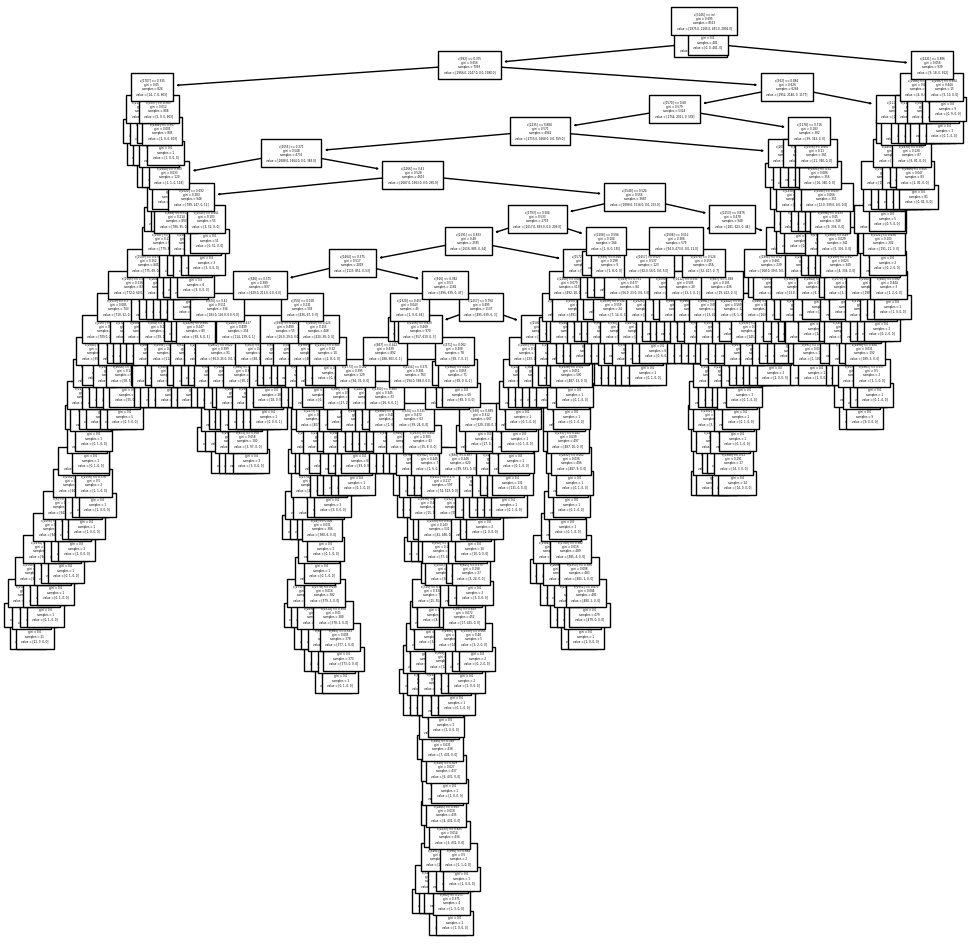

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
# from IPython.display import Image, display
# import pydotplus

iris = load_iris()

# Plotting decision tree
plt.figure(figsize=(12, 12))
tree.plot_tree(modelTree, fontsize=2)
plt.show()

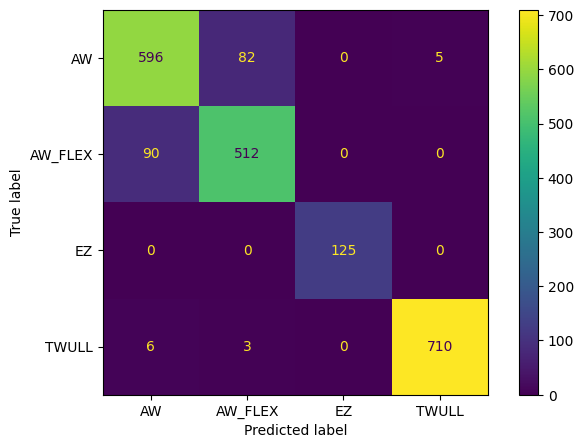

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plotting confusion matrix
fig, ax = plt.subplots(figsize= (8,5))
conf = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred),display_labels=['AW', 'AW_FLEX', 'EZ', 'TWULL'])

conf.plot(ax=ax)
plt.show()

In [ ]:
# grid search for tuning
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]
              }

# create grid search object
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# grid search over the parameter space
start_time = time.time()
g1.fit(X_train,Y_train)
duration = time.time() - start_time

# show best parameter configuration found
params1 = g1.best_params_
params1

KeyboardInterrupt: 

In [ ]:
# Plotting Fiber Images and Comparing Predicted Class to Actual Class

tree_pred = y_pred

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
fig.tight_layout()
axes = axes.ravel()

for i in np.arange(0, L * W):
    r = random.randint(0, len(y_pred))
    axes[i].imshow(X_test[r].reshape(151,21))
    axes[i].set_title(f"Prediction Class = {tree_pred[r]}\n Original Class = {Y_test[r]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier using gini impurity index
randomTree = RandomForestClassifier(criterion='gini', bootstrap=True)

randomTree.fit(X_train, Y_train)

rf_pred = randomTree.predict(X_test)

In [ ]:
# random forest metrics
print("Accuracy score: ", accuracy_score(Y_test,rf_pred))
print("Precision Score : ",precision_score(Y_test, rf_pred,average='micro'))
print("Recall Score : ", recall_score(Y_test, rf_pred, average='micro'))

Accuracy score:  0.9793330201972757
Precision Score :  0.9793330201972757
Recall Score :  0.9793330201972757


In [ ]:
# Graphwiz package to environment
os.environ["PATH"] += os.pathsep + 'C:/Users/landy/Documents/VSCODE/ML/Graphviz-12.0.0-win64/bin'

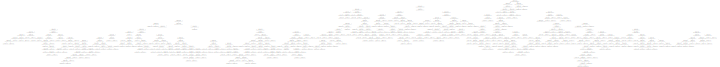

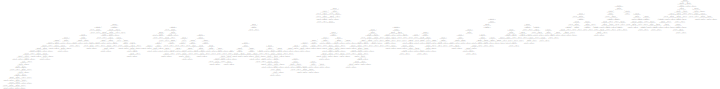

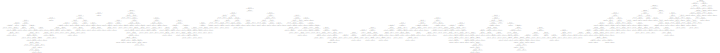

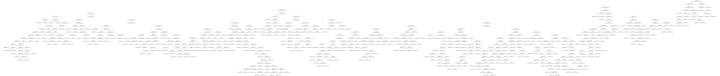

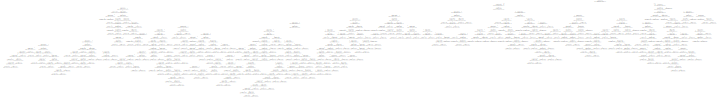

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz
import graphviz

# plotting some decision trees in forest
for i in range(5):
    tree = randomTree.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               impurity=False,
                               proportion=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"10,10!"')
    gvz_graph = graphviz.Source(pydot_graph.to_string())
    display(gvz_graph)

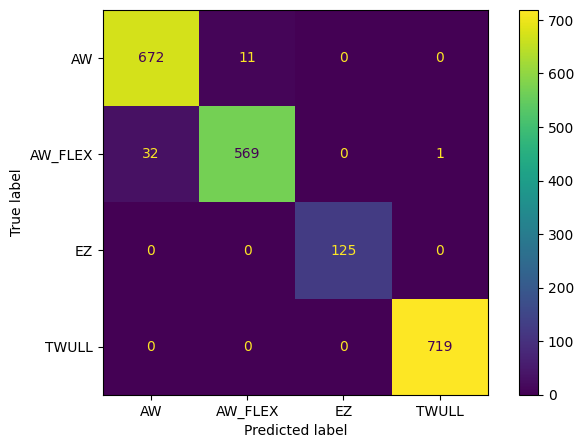

In [ ]:
# random forest classifier confusion matrix
fig, ax = plt.subplots(figsize= (8,5))
conf = ConfusionMatrixDisplay(confusion_matrix(Y_test, rf_pred),display_labels=['AW', 'AW_FLEX', 'EZ', 'TWULL'])

conf.plot(ax=ax)
plt.show()

In [ ]:
# Plotting Fiber Images and Comparing Predicted Class to Actual Class

rand_tree_pred = rf_pred

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
fig.tight_layout()
axes = axes.ravel()

for i in np.arange(0, L * W):
    r = random.randint(0, len(rf_pred))
    axes[i].imshow(X_test[r].reshape(151,21))
    axes[i].set_title(f"Prediction Class = {rand_tree_pred[r]}\n Original Class = {Y_test[r]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.7)